In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import entNetV2S
from tensorflow.keras.models import Model
from classification_models.tfkeras import Classifiers
from tensorflow.keras.models import load_model
from skimage import color
from pathlib import Path
from PIL import Image
import numpy as np

import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Conv2D,  Dropout, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model, regularizers
from keras import models
from keras import layers
from classification_models.tfkeras import Classifiers
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')


In [72]:
# Gathering Data
import os
import cv2

base_dir = 'C:/Users/Aris/chest_images/raw_data'

normal_dir = os.path.join(base_dir, 'normal')
pneumonia_dir = os.path.join(base_dir, 'pneumonia')

normal_img_dir = list()
pneumonia_img_dir = list()

for dirpath, dirnames, filenames in os.walk(normal_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            normal_img_dir.append(image_path)

for dirpath, dirnames, filenames in os.walk(pneumonia_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            pneumonia_img_dir.append(image_path)

In [93]:
#Resize + Save

target_dir = 'C:/Users/Aris/chest_images/combined_dataV1'

for i, img_path in enumerate(normal_img_dir[:200]):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"normal-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

for i, img_path in enumerate(pneumonia_img_dir[:200]):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"pneumonia-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

In [2]:
base_model = Xception() #build model
model = Model(inputs=base_model.input,
                   outputs=base_model.get_layer('predictions').output)

In [3]:
model.save('C:\\Users\Aris\OneDrive\Documents\TKC_CIBR\TKC-TUGAS3dan4-CIBR\static\model\Xception.h5')

In [4]:
class FeatureExtractor:
    def __init__(self, model):
        self.model = model
    
    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')
        	
        x = tf.keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        feature = self.model.predict(x)[0]
        
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor(load_model('C:\\Users\Aris\OneDrive\Documents\TKC_CIBR\TKC-TUGAS3dan4-CIBR\static\model\Xception.h5', compile=False))

In [5]:
feature_dir = 'C:/Users/Aris/OneDrive/Documents/TKC_CIBR/TKC-TUGAS3dan4-CIBR/static/feature'
base_dir = 'C:/Users/Aris/chest_images/combined_dataV1'

img_paths = list()
features = list()

for img_path in sorted(Path(base_dir).glob("*.jpeg")):
    print(img_path)
    img_paths.append(img_path)
    feature = fe.extract(img=Image.open(img_path))
#    print(feature)
    features.append(feature)

features = np.array(features)
np.save(feature_dir + '/extracted_feature_Xception.npy', features)

C:\Users\Aris\chest_images\combined_dataV1\normal-1.jpeg
1/1 [==============================] - 6s 6s/step
C:\Users\Aris\chest_images\combined_dataV1\normal-10.jpeg
1/1 [==============================] - 0s 26ms/step
C:\Users\Aris\chest_images\combined_dataV1\normal-100.jpeg
1/1 [==============================] - 0s 24ms/step
C:\Users\Aris\chest_images\combined_dataV1\normal-101.jpeg
1/1 [==============================] - 0s 24ms/step
C:\Users\Aris\chest_images\combined_dataV1\normal-102.jpeg
1/1 [==============================] - 0s 24ms/step
C:\Users\Aris\chest_images\combined_dataV1\normal-103.jpeg
1/1 [==============================] - 0s 23ms/step
C:\Users\Aris\chest_images\combined_dataV1\normal-104.jpeg
1/1 [==============================] - 0s 25ms/step
C:\Users\Aris\chest_images\combined_dataV1\normal-105.jpeg
1/1 [==============================] - 0s 24ms/step
C:\Users\Aris\chest_images\combined_dataV1\normal-106.jpeg
1/1 [==============================] - 0s 23ms/step
C:\Use

1/1 [==============================] - 0s 24ms/step


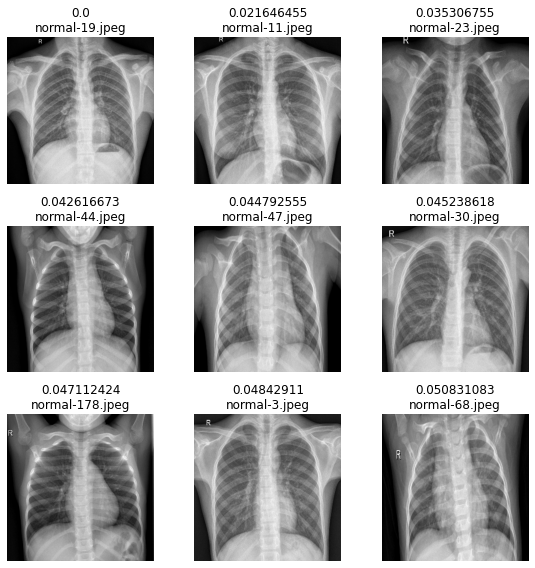

In [6]:
#Testing Image
import matplotlib.pyplot as plt
import numpy as np
import os

query_image = img_paths[100]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 35ms/step


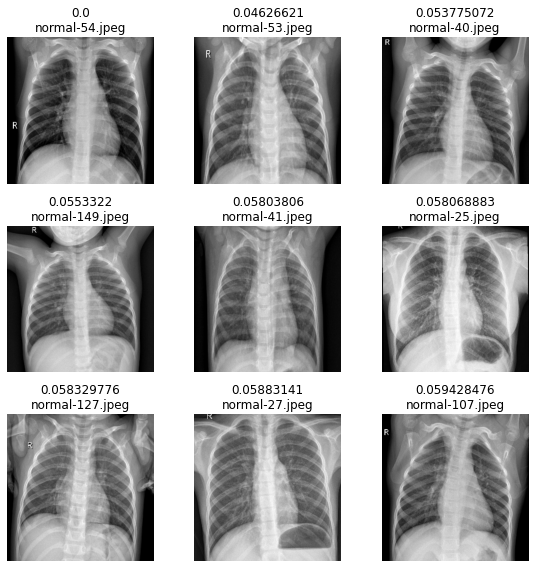

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

query_image = img_paths[150]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()